# Example 5.10

Metropolis Hastings on the banana example in Example 5.10.

<ipython-input-4-99e4fad60f94>:53: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:
<ipython-input-4-99e4fad60f94>:60: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


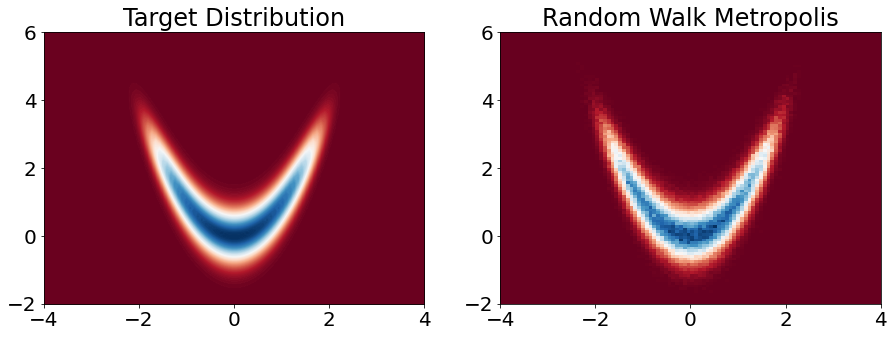

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(24)

# banana function for testing MCMC
def log_banana(x, y):
    return -x**2 / 10 - y**4 / 100 - 2 * (y - x**2)**2

def grad_banana(x, y):
    return np.array([-x/5 + 8 * y * x - 8 * x**3, -(2 * y**3)/5 - 4 * y + 4 * x**2])

def log_MALA_kernel(x_s, x, gamma, grad_banana):
    return - 1/4 * np.linalg.norm(x_s - x + gamma * grad_banana(x[0], x[1]))**2

N = 1000000
samples_RW = np.zeros((2, N))

# initial values
x = 0
y = 0
samples_RW[:, 0] = np.array([x, y])
# parameters
gamma = 0.005

sigma_rw = 0.5

burnin = 200

for n in range(1, N):
    # random walk
    x_s = samples_RW[:, n-1] + sigma_rw * np.random.randn(2)
    # metropolis
    u = rng.uniform(0, 1)

    if np.log(u) < log_banana(x_s[0], x_s[1]) - log_banana(samples_RW[0, n-1], samples_RW[1, n-1]):
        samples_RW[:, n] = x_s
    else:
        samples_RW[:, n] = samples_RW[:, n-1]


# for surf plot banana 2d
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb, Y_bb = np.meshgrid(x_bb, y_bb)
Z_bb = np.exp(log_banana(X_bb, Y_bb))

plt.figure(figsize=(15, 5))
# make fonts bigger
plt.rcParams.update({'font.size': 20})
plt.subplot(1, 2, 1)
cnt = plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu')
for c in cnt.collections:
    c.set_edgecolor("face")
plt.title('Target Distribution')

plt.subplot(1, 2, 2)
plt.hist2d(samples_RW[0, burnin:n], samples_RW[1, burnin:n], 100, cmap='RdBu', range=[[-4, 4], [-2, 6]], density=True)
# remove the white edges from plt.hist2d
for c in cnt.collections:
    c.set_edgecolor("face")

plt.title('Random Walk Metropolis')
plt.show()